In [1]:
cd /home/c01muya/vae-disentanglement/disentanglement_lib_pl

/home/c01muya/vae-disentanglement/disentanglement_lib_pl


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns

import torch
import torchvision.utils as vutils
import torchvision.transforms.functional as T
from torch.utils.data import DataLoader
from torchvision import transforms

from vae_experiment import VAEExperiment
from common.data_loader import DSpritesDataset, ThreeShapesDataset, ContinumDataset
from notebook_utils import *

# Change figure aesthetics
%matplotlib inline
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 1.5})

In [1]:
curr_dev = torch.device("cuda:2")
batch_size = 144
seed = 123

NameError: name 'torch' is not defined

# $\beta$-VAE on 3shapesNoisy ($\beta =1$)

In [4]:
beta = 1.0
z_dim = 2
batch_size = 64
checkpoint_path="../pl-dt-test/3shapesnoisy_beta1/version_0/checkpoints/epoch=99-step=13999.ckpt"


acts_for_threeshapesn, threeshapesn_dataset, model_threeshapesn = load_model_and_data_and_get_activations(
                    dset_name='threeshapesnoisy', dset_path='../datasets', 
                    batch_size=batch_size, z_dim=z_dim , beta=beta, 
                    checkpoint_path=checkpoint_path, current_device=curr_dev, 
                    activation_with_label=True, seed=123,  batches=None
    )


100%|██████████████████████████████████████████████| 140/140 [00:02<00:00, 56.06it/s]


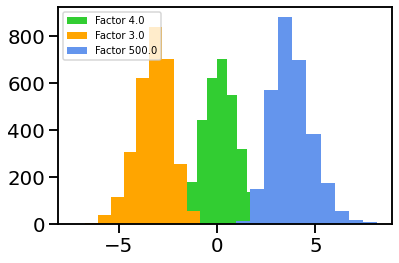

In [5]:
plt.hist(acts_for_threeshapesn[4.0][:,0], label="Factor 4.0",color='limegreen')
plt.hist(acts_for_threeshapesn[3.0][:,0], label="Factor 3.0",color='orange')
plt.hist(acts_for_threeshapesn[500.0][:,0], label="Factor 500.0", color='cornflowerblue')
plt.legend(prop={'size': 10}, loc='upper left')

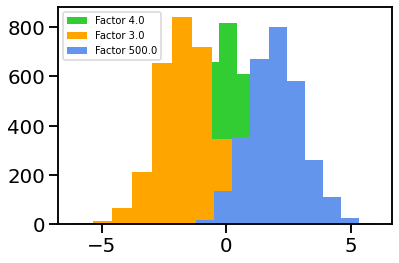

In [6]:
plt.hist(acts_for_threeshapesn[4.0][:,1], label="Factor 4.0",color='limegreen')
plt.hist(acts_for_threeshapesn[3.0][:,1], label="Factor 3.0",color='orange')
plt.hist(acts_for_threeshapesn[500.0][:,1], label="Factor 500.0", color='cornflowerblue')
plt.legend(prop={'size': 10}, loc='upper left')

Visualizing latent space from 0.619251012802124 to 6.719251012802124, with center at 3.619251012802124
Visualizing latent space from 0.46092963218688965 to 6.560929632186889, with center at 3.4609296321868896


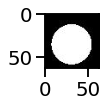

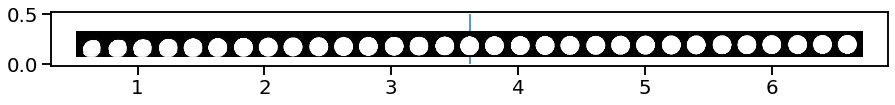

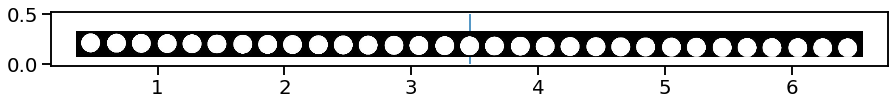

In [7]:
rnd_image = threeshapesn_dataset.__getitem__(101)[0]
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(rnd_image.permute(1,2,0), cmap='gray')
rnd_image = rnd_image.unsqueeze(0).to(curr_dev)
traverse_maps, ref = do_latent_traversal_scatter(model_threeshapesn, rnd_image, limit=2, 
                                            inter=1/5, loc=0, mode='relative')

fig, ax = plt.subplots(figsize=(15,1))
for z, img in traverse_maps:
    ax.scatter(z, 0.2) 
    ab = AnnotationBbox(OffsetImage(img.squeeze(0).cpu().permute(1,2,0), zoom=0.4,cmap='gray'), 
                        (z, 0.2), 
                        frameon=False)
    ax.add_artist(ab)
ax.vlines(ref,0,0.5)

traverse_maps, ref = do_latent_traversal_scatter(model_threeshapesn, rnd_image, limit=2, 
                                            inter=1/5, loc=1, mode='relative')

fig, ax = plt.subplots(figsize=(15,1))
for z, img in traverse_maps:
    ax.scatter(z, 0.2) 
    ab = AnnotationBbox(OffsetImage(img.squeeze(0).cpu().permute(1,2,0), zoom=0.4,cmap='gray'), 
                        (z, 0.2), 
                        frameon=False)
    ax.add_artist(ab)
ax.vlines(ref,0,0.5)

Visualizing latent space from -6.143770933151245 to -0.04377093315124511, with center at -3.143770933151245
Visualizing latent space from -3.620492100715637 to 2.479507899284363, with center at -0.6204921007156372


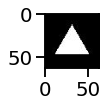

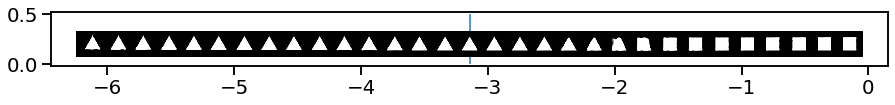

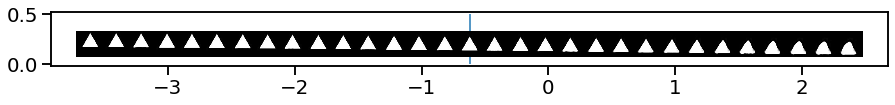

In [8]:
rnd_image = threeshapesn_dataset.__getitem__(1000)[0]
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(rnd_image.permute(1,2,0), cmap='gray')
rnd_image = rnd_image.unsqueeze(0).to(curr_dev)
traverse_maps, ref = do_latent_traversal_scatter(model_threeshapesn, rnd_image, limit=2, 
                                            inter=1/5, loc=0, mode='relative')

fig, ax = plt.subplots(figsize=(15,1))

for z, img in traverse_maps:
    ax.scatter(z, 0.2) 
    ab = AnnotationBbox(OffsetImage(img.squeeze(0).cpu().permute(1,2,0), zoom=0.4,cmap='gray'), 
                        (z, 0.2), 
                        frameon=False)
    ax.add_artist(ab)
ax.vlines(ref,0,0.5)

traverse_maps, ref = do_latent_traversal_scatter(model_threeshapesn, rnd_image, limit=2, 
                                            inter=1/5, loc=1, mode='relative')

fig, ax = plt.subplots(figsize=(15,1))
for z, img in traverse_maps:
    ax.scatter(z, 0.2) 
    ab = AnnotationBbox(OffsetImage(img.squeeze(0).cpu().permute(1,2,0), zoom=0.4,cmap='gray'), 
                        (z, 0.2), 
                        frameon=False)
    ax.add_artist(ab)
ax.vlines(ref,0,0.5)

Visualizing latent space from -6.8340089321136475 to -0.7340089321136475, with center at -3.8340089321136475
Visualizing latent space from -4.816999197006226 to 1.2830008029937745, with center at -1.8169991970062256


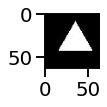

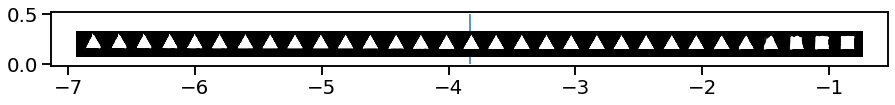

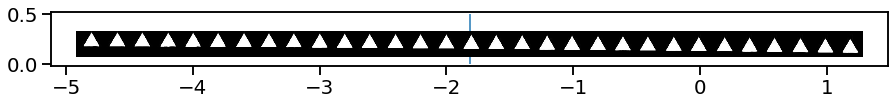

In [9]:
rnd_image = threeshapesn_dataset.__getitem__(500)[0]
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(rnd_image.permute(1,2,0), cmap='gray')
rnd_image = rnd_image.unsqueeze(0).to(curr_dev)
traverse_maps, ref = do_latent_traversal_scatter(model_threeshapesn, rnd_image, limit=2, 
                                            inter=1/5, loc=0, mode='relative')
fig, ax = plt.subplots(figsize=(15,1))

for z, img in traverse_maps:
    ax.scatter(z, 0.2) 
    ab = AnnotationBbox(OffsetImage(img.squeeze(0).cpu().permute(1,2,0), zoom=0.4,cmap='gray'), 
                        (z, 0.2), 
                        frameon=False)
    ax.add_artist(ab)
ax.vlines(ref,0,0.5)
traverse_maps, ref = do_latent_traversal_scatter(model_threeshapesn, rnd_image, limit=2, 
                                            inter=1/5, loc=1, mode='relative')

fig, ax = plt.subplots(figsize=(15,1))
for z, img in traverse_maps:
    ax.scatter(z, 0.2) 
    ab = AnnotationBbox(OffsetImage(img.squeeze(0).cpu().permute(1,2,0), zoom=0.4,cmap='gray'), 
                        (z, 0.2), 
                        frameon=False)
    ax.add_artist(ab)
ax.vlines(ref,0,0.5)

# $\beta$-VAE on 3shapesNoisy ($\beta =4$)

In [10]:
beta = 4.0
z_dim = 2
batch_size = 64
checkpoint_path="../pl-dt-test/3shapesnoisy_beta4/version_0/checkpoints/epoch=99-step=6999.ckpt"


acts_for_threeshapesnb4, threeshapesn_datasetb4, model_threeshapesnb4 = load_model_and_data_and_get_activations(
                    dset_name='threeshapesnoisy', dset_path='../datasets', 
                    batch_size=batch_size, z_dim=z_dim , beta=beta, 
                    checkpoint_path=checkpoint_path, current_device=curr_dev, 
                    activation_with_label=True, seed=123,  batches=None
    )


100%|██████████████████████████████████████████████| 140/140 [00:02<00:00, 68.23it/s]


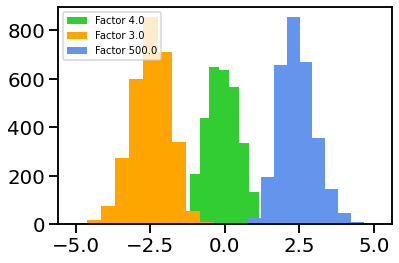

In [11]:
plt.hist(acts_for_threeshapesnb4[4.0][:,0], label="Factor 4.0",color='limegreen')
plt.hist(acts_for_threeshapesnb4[3.0][:,0], label="Factor 3.0",color='orange')
plt.hist(acts_for_threeshapesnb4[500.0][:,0], label="Factor 500.0", color='cornflowerblue')
plt.legend(prop={'size': 10}, loc='upper left')

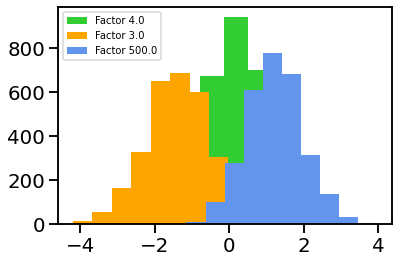

In [12]:
plt.hist(acts_for_threeshapesnb4[4.0][:,1], label="Factor 4.0",color='limegreen')
plt.hist(acts_for_threeshapesnb4[3.0][:,1], label="Factor 3.0",color='orange')
plt.hist(acts_for_threeshapesnb4[500.0][:,1], label="Factor 500.0", color='cornflowerblue')
plt.legend(prop={'size': 10}, loc='upper left')

Visualizing latent space from -5.621250152587891 to 0.47874984741210935, with center at -2.6212501525878906
Visualizing latent space from -4.541130423545837 to 1.5588695764541627, with center at -1.5411304235458374


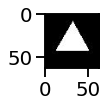

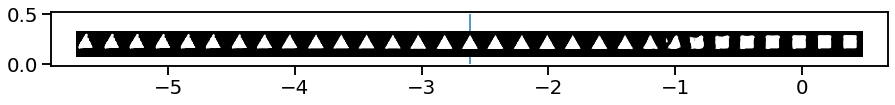

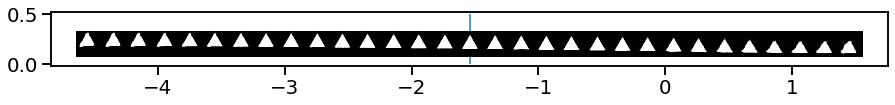

In [13]:
rnd_image = threeshapesn_datasetb4.__getitem__(200)[0]
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(rnd_image.permute(1,2,0), cmap='gray')
rnd_image = rnd_image.unsqueeze(0).to(curr_dev)
traverse_maps, ref = do_latent_traversal_scatter(model_threeshapesnb4, rnd_image, limit=2, 
                                            inter=1/5, loc=0, mode='relative')

fig, ax = plt.subplots(figsize=(15,1))

for z, img in traverse_maps:
    ax.scatter(z, 0.2) 
    ab = AnnotationBbox(OffsetImage(img.squeeze(0).cpu().permute(1,2,0), zoom=0.4,cmap='gray'), 
                        (z, 0.2), 
                        frameon=False)
    ax.add_artist(ab)

ax.vlines(ref,0,0.5)

traverse_maps, ref = do_latent_traversal_scatter(model_threeshapesnb4, rnd_image, limit=2, 
                                            inter=1/5, loc=1, mode='relative')

fig, ax = plt.subplots(figsize=(15,1))

for z, img in traverse_maps:
    ax.scatter(z, 0.2) 
    ab = AnnotationBbox(OffsetImage(img.squeeze(0).cpu().permute(1,2,0), zoom=0.4,cmap='gray'), 
                        (z, 0.2), 
                        frameon=False)
    ax.add_artist(ab)

ax.vlines(ref,0,0.5)

# $\beta$-VAE on dsprites_full

In [10]:
beta = 1.0
z_dim = 6
batch_size = 256
checkpoint_path="../pl-dt-test/dsprites_full_beta1/version_0/checkpoints/epoch=51-step=539135.ckpt"


acts_for_dsprites_full, dsprites_full_dataset, model_dsprites_full  = load_model_and_data_and_get_activations(
                    dset_name='dsprites_full', dset_path='../datasets', 
                    batch_size=batch_size, z_dim=z_dim , beta=beta, 
                    checkpoint_path=checkpoint_path, current_device=curr_dev, 
                    activation_with_label=False, seed=123,  batches=2000
    )


 77%|███████████████████████████████▋         | 2000/2592 [00:15<00:04, 131.09it/s]


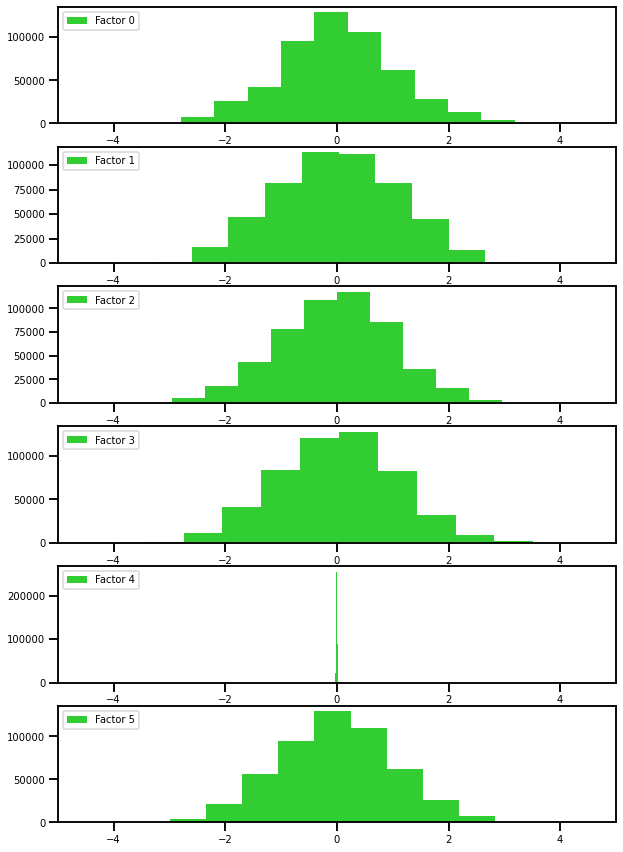

In [15]:
fig, axes = plt.subplots(6, figsize=(10,15))

for a in range(6):
    axes[a].hist(acts_for_dsprites_full[a], label=f"Factor {a}", color='limegreen')
    axes[a].tick_params(axis='both', which='major', labelsize=10)
    axes[a].legend(prop={'size': 10}, loc='upper left')
    axes[a].set_xlim(-5,5)

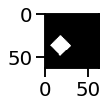

In [25]:
anchor_image = dsprites_full_dataset.__getitem__(100)[0]
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(anchor_image.permute(1,2,0), cmap='gray')
anchor_image = anchor_image.unsqueeze(0).to(curr_dev)

Visualizing latent space from -3.1295401602983475 to 2.9704598397016526, with center at -0.12954016029834747
Visualizing latent space from -1.2669376134872437 to 4.833062386512756, with center at 1.7330623865127563
Visualizing latent space from -4.116194248199463 to 1.9838057518005372, with center at -1.116194248199463
Visualizing latent space from -1.4119844436645508 to 4.688015556335449, with center at 1.5880155563354492
Visualizing latent space from -2.99371749535203 to 3.1062825046479703, with center at 0.0062825046479702
Visualizing latent space from -2.58431014418602 to 3.51568985581398, with center at 0.4156898558139801


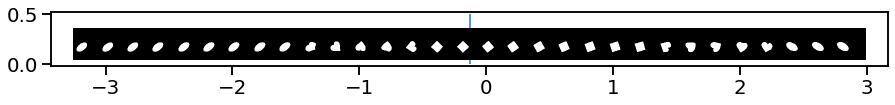

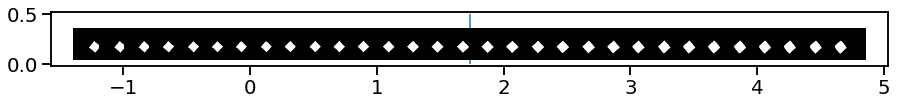

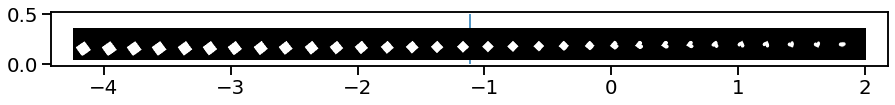

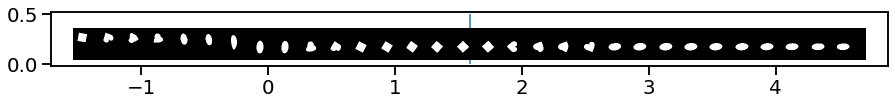

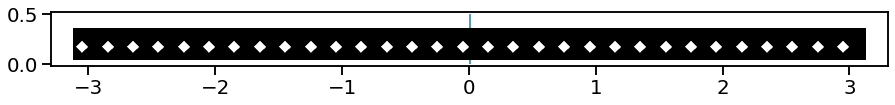

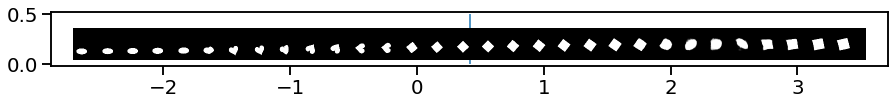

In [27]:
show_traversal_plot(model_dsprites_full, anchor_image, limit=2, interp_step=1/5, dim=0, mode='relative')
show_traversal_plot(model_dsprites_full, anchor_image, limit=2, interp_step=1/5, dim=1, mode='relative')
show_traversal_plot(model_dsprites_full, anchor_image, limit=2, interp_step=1/5, dim=2, mode='relative')
show_traversal_plot(model_dsprites_full, anchor_image, limit=2, interp_step=1/5, dim=3, mode='relative')
show_traversal_plot(model_dsprites_full, anchor_image, limit=2, interp_step=1/5, dim=4, mode='relative')
show_traversal_plot(model_dsprites_full, anchor_image, limit=2, interp_step=1/5, dim=5, mode='relative')

# $\beta$-VAE on dsprites_full ($\beta = 4$)


In [29]:
beta = 4.0
z_dim = 6
batch_size = 256
checkpoint_path="../pl-dt-test/dsprites_full_beta4/version_0/checkpoints/epoch=60-step=316223.ckpt"

acts_for_dsprites_full, dsprites_full_dataset, model_dsprites_full  = load_model_and_data_and_get_activations(
                    dset_name='dsprites_full', dset_path='../datasets', 
                    batch_size=batch_size, z_dim=z_dim , beta=beta, 
                    checkpoint_path=checkpoint_path, current_device=curr_dev, 
                    activation_with_label=False, seed=123,  batches=2000
    )


 77%|█████████████████████████████████▏         | 2000/2592 [00:14<00:04, 135.30it/s]


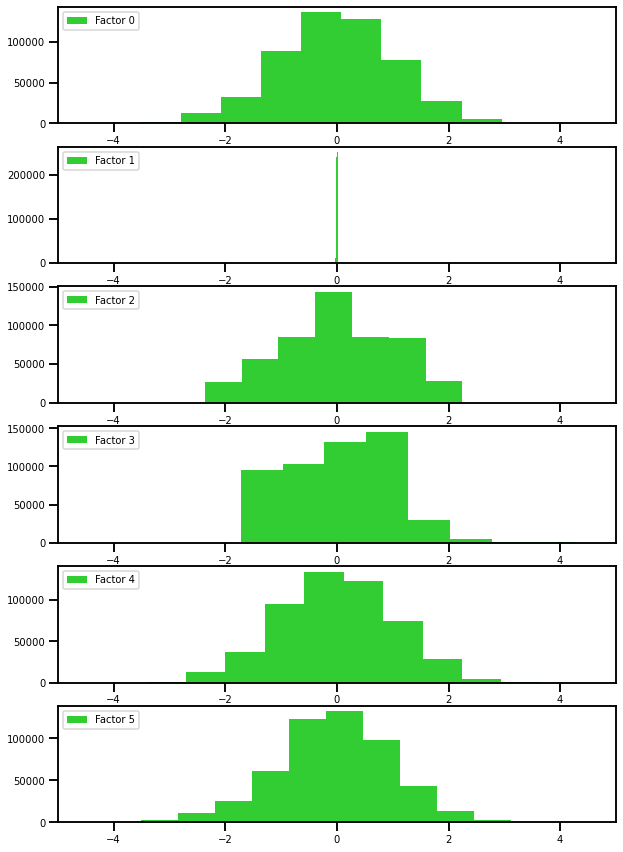

In [30]:
fig, axes = plt.subplots(6, figsize=(10,15))

for a in range(6):
    axes[a].hist(acts_for_dsprites_full[a], label=f"Factor {a}", color='limegreen')
    axes[a].tick_params(axis='both', which='major', labelsize=10)
    axes[a].legend(prop={'size': 10}, loc='upper left')
    axes[a].set_xlim(-5,5)

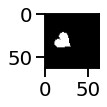

In [31]:
anchor_image = dsprites_full_dataset.__getitem__(100)[0]
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(anchor_image.permute(1,2,0), cmap='gray')
anchor_image = anchor_image.unsqueeze(0).to(curr_dev)

Visualizing latent space from -2.939066380262375 to 3.160933619737625, with center at 0.06093361973762512
Visualizing latent space from -2.9950419254601 to 3.1049580745399, with center at 0.004958074539899826
Visualizing latent space from -3.723809838294983 to 2.376190161705017, with center at -0.7238098382949829
Visualizing latent space from -2.802842140197754 to 3.297157859802246, with center at 0.1971578598022461
Visualizing latent space from -4.013210296630859 to 2.0867897033691407, with center at -1.0132102966308594
Visualizing latent space from -3.87691330909729 to 2.22308669090271, with center at -0.87691330909729


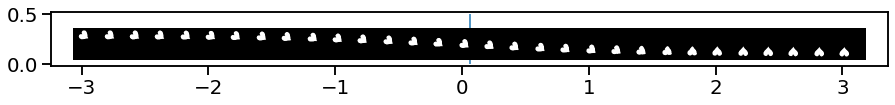

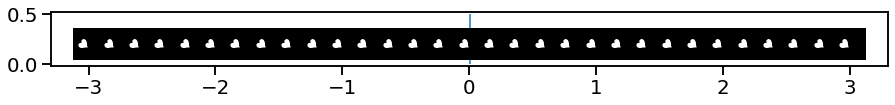

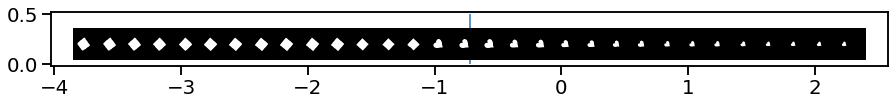

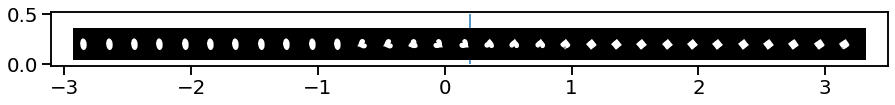

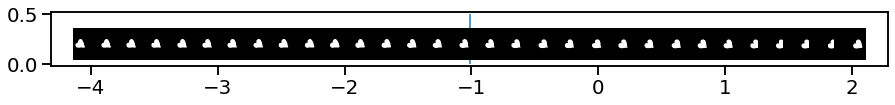

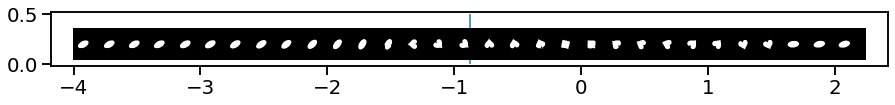

In [32]:
show_traversal_plot(model_dsprites_full, anchor_image, limit=2, interp_step=1/5, dim=0, mode='relative')
show_traversal_plot(model_dsprites_full, anchor_image, limit=2, interp_step=1/5, dim=1, mode='relative')
show_traversal_plot(model_dsprites_full, anchor_image, limit=2, interp_step=1/5, dim=2, mode='relative')
show_traversal_plot(model_dsprites_full, anchor_image, limit=2, interp_step=1/5, dim=3, mode='relative')
show_traversal_plot(model_dsprites_full, anchor_image, limit=2, interp_step=1/5, dim=4, mode='relative')
show_traversal_plot(model_dsprites_full, anchor_image, limit=2, interp_step=1/5, dim=5, mode='relative')

# $\beta$-VAE on dsprites_correlated

In [5]:
beta = 1.0
z_dim = 6
batch_size = 144
checkpoint_path="../pl-dt-test/dsprites_colored_beta1_working/version_4/checkpoints/epoch=55-step=290303.ckpt"


acts_for_dsprites_corr, dsprites_corr_dataset, model_dsprites_corr  = load_model_and_data_and_get_activations(
                    dset_name='dsprites_colored', dset_path='../datasets', 
                    batch_size=batch_size, z_dim=z_dim , beta=beta, 
                    checkpoint_path=checkpoint_path, current_device=curr_dev, 
                    activation_with_label=False, seed=123,  batches=2000, in_channels=3
    )

 43%|██████████████████▋                        | 2000/4608 [00:17<00:22, 115.48it/s]


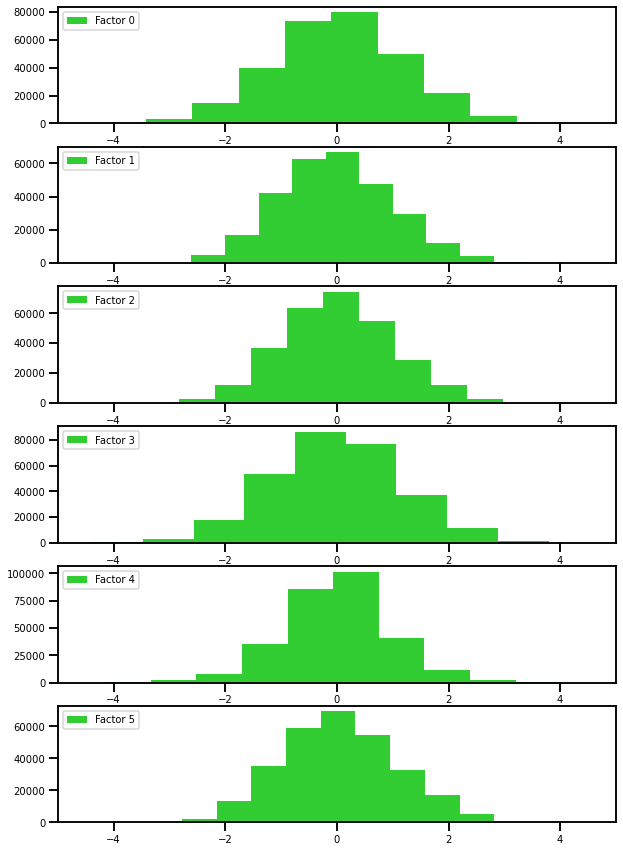

In [6]:
fig, axes = plt.subplots(6, figsize=(10,15))

for a in range(6):
    axes[a].hist(acts_for_dsprites_corr[a], label=f"Factor {a}", color='limegreen')
    axes[a].tick_params(axis='both', which='major', labelsize=10)
    axes[a].legend(prop={'size': 10}, loc='upper left')
    axes[a].set_xlim(-5,5)

Visualizing latent space from -3.31 to 2.79, with center at -0.31
Visualizing latent space from -3.17 to 2.93, with center at -0.17
Visualizing latent space from -3.65 to 2.45, with center at -0.65
Visualizing latent space from -0.93 to 5.17, with center at 2.07
Visualizing latent space from -2.50 to 3.60, with center at 0.50
Visualizing latent space from -3.30 to 2.80, with center at -0.30


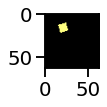

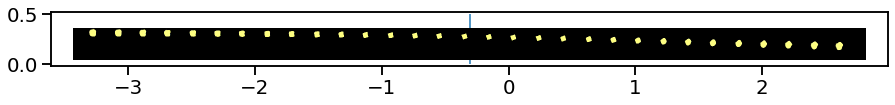

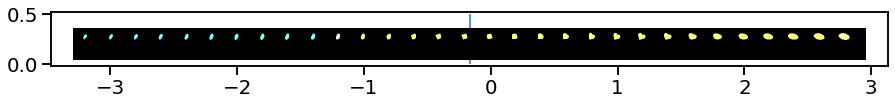

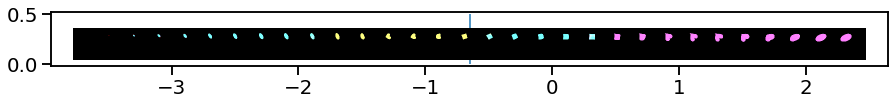

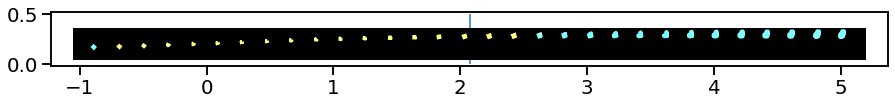

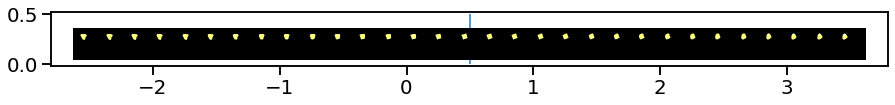

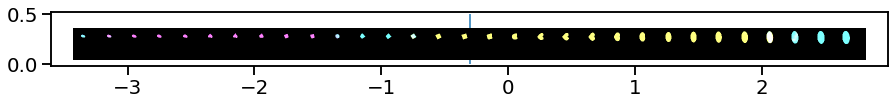

In [9]:
anchor_image = dsprites_corr_dataset.__getitem__(200)[0]
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(anchor_image.permute(1,2,0), cmap='gray')
anchor_image = anchor_image.unsqueeze(0).to(curr_dev)
show_traversal_plot(model_dsprites_corr, anchor_image, limit=2, interp_step=1/5, dim=0, mode='relative')
show_traversal_plot(model_dsprites_corr, anchor_image, limit=2, interp_step=1/5, dim=1, mode='relative')
show_traversal_plot(model_dsprites_corr, anchor_image, limit=2, interp_step=1/5, dim=2, mode='relative')
show_traversal_plot(model_dsprites_corr, anchor_image, limit=2, interp_step=1/5, dim=3, mode='relative')
show_traversal_plot(model_dsprites_corr, anchor_image, limit=2, interp_step=1/5, dim=4, mode='relative')
show_traversal_plot(model_dsprites_corr, anchor_image, limit=2, interp_step=1/5, dim=5, mode='relative')

Visualizing latent space from -2.11 to 3.99, with center at 0.89
Visualizing latent space from -2.87 to 3.23, with center at 0.13
Visualizing latent space from -0.95 to 5.15, with center at 2.05
Visualizing latent space from -2.08 to 4.02, with center at 0.92
Visualizing latent space from -2.98 to 3.12, with center at 0.02
Visualizing latent space from -3.59 to 2.51, with center at -0.59


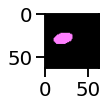

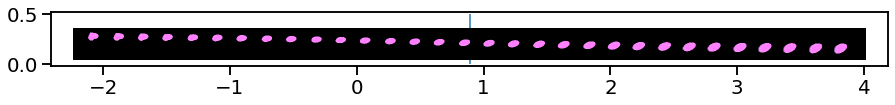

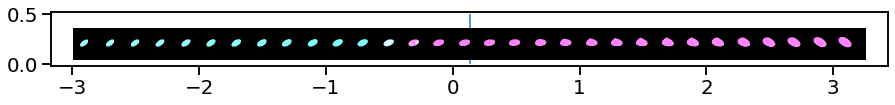

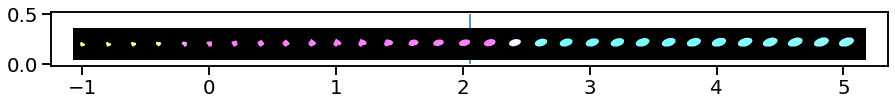

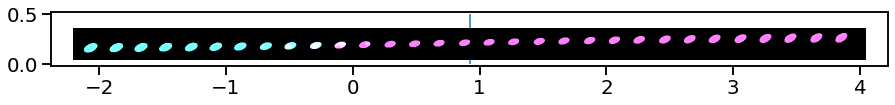

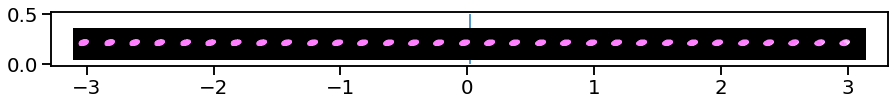

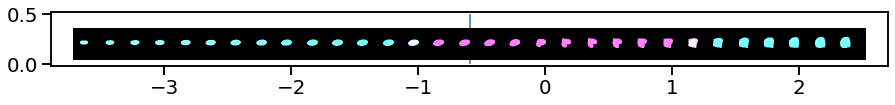

In [11]:
anchor_image = dsprites_corr_dataset.__getitem__(5)[0]
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(anchor_image.permute(1,2,0), cmap='gray')
anchor_image = anchor_image.unsqueeze(0).to(curr_dev)
show_traversal_plot(model_dsprites_corr, anchor_image, limit=2, interp_step=1/5, dim=0, mode='relative')
show_traversal_plot(model_dsprites_corr, anchor_image, limit=2, interp_step=1/5, dim=1, mode='relative')
show_traversal_plot(model_dsprites_corr, anchor_image, limit=2, interp_step=1/5, dim=2, mode='relative')
show_traversal_plot(model_dsprites_corr, anchor_image, limit=2, interp_step=1/5, dim=3, mode='relative')
show_traversal_plot(model_dsprites_corr, anchor_image, limit=2, interp_step=1/5, dim=4, mode='relative')
show_traversal_plot(model_dsprites_corr, anchor_image, limit=2, interp_step=1/5, dim=5, mode='relative')

# $\beta$-VAE on dsprites_correlated ($\beta = 4$)

In [41]:
beta = 4.0
z_dim = 6
batch_size = 144
checkpoint_path="../pl-dt-test/dsprites_colored_beta4/version_0/checkpoints/epoch=49-step=259199.ckpt"


acts_for_dsprites_corrb4, dsprites_corr_datasetb4, model_dsprites_corrb4  = load_model_and_data_and_get_activations(
                    dset_name='dsprites_colored', dset_path='../datasets', 
                    batch_size=batch_size, z_dim=z_dim , beta=beta, 
                    checkpoint_path=checkpoint_path, current_device=curr_dev, 
                    activation_with_label=False, seed=123,  batches=2000, in_channels=3
    )

 43%|█████████████████▊                       | 2000/4608 [00:17<00:22, 116.65it/s]


In [ ]:
fig, axes = plt.subplots(6, figsize=(10,15))

for a in range(6):
    axes[a].hist(acts_for_dsprites_corrb4[a], label=f"Factor {a}", color='limegreen')
    axes[a].tick_params(axis='both', which='major', labelsize=10)
    axes[a].legend(prop={'size': 10}, loc='upper left')
    axes[a].set_xlim(-5,5)

In [ ]:
anchor_image = dsprites_corr_datasetb4.__getitem__(200)[0]
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(anchor_image.permute(1,2,0), cmap='gray')
anchor_image = anchor_image.unsqueeze(0).to(curr_dev)
show_traversal_plot(model_dsprites_corrb4, anchor_image, limit=2, interp_step=1/5, dim=0, mode='relative')
show_traversal_plot(model_dsprites_corrb4, anchor_image, limit=2, interp_step=1/5, dim=1, mode='relative')
show_traversal_plot(model_dsprites_corrb4, anchor_image, limit=2, interp_step=1/5, dim=2, mode='relative')
show_traversal_plot(model_dsprites_corrb4, anchor_image, limit=2, interp_step=1/5, dim=3, mode='relative')
show_traversal_plot(model_dsprites_corrb4, anchor_image, limit=2, interp_step=1/5, dim=4, mode='relative')
show_traversal_plot(model_dsprites_corrb4, anchor_image, limit=2, interp_step=1/5, dim=5, mode='relative')

In [ ]:
anchor_image = dsprites_corr_datasetb4.__getitem__(5)[0]
fig, ax = plt.subplots(figsize=(1,1))
ax.imshow(anchor_image.permute(1,2,0), cmap='gray')
anchor_image = anchor_image.unsqueeze(0).to(curr_dev)
show_traversal_plot(model_dsprites_corrb4, anchor_image, limit=2, interp_step=1/5, dim=0, mode='relative')
show_traversal_plot(model_dsprites_corrb4, anchor_image, limit=2, interp_step=1/5, dim=1, mode='relative')
show_traversal_plot(model_dsprites_corrb4, anchor_image, limit=2, interp_step=1/5, dim=2, mode='relative')
show_traversal_plot(model_dsprites_corrb4, anchor_image, limit=2, interp_step=1/5, dim=3, mode='relative')
show_traversal_plot(model_dsprites_corrb4, anchor_image, limit=2, interp_step=1/5, dim=4, mode='relative')
show_traversal_plot(model_dsprites_corrb4, anchor_image, limit=2, interp_step=1/5, dim=5, mode='relative')